Exploratory Data Analysis(EDA)

Conduct EDA for customer churn on telecom industry and examining relationship between variables and patterns in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings tha
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

%matplotlib inline
from sklearn.preprocessing import LabelEncoder


Load the Data

In [2]:
# Load the data. 
#created a variable call
telco_csr_churn = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

#read the csv file into 
Telco_csr_churn = pd.read_csv(telco_csr_churn)

Explore and Clean the Data

In [3]:
#checking appearance
Telco_csr_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
Telco_csr_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#check for duplicates
Telco_csr_churn.duplicated().sum()
#no duplicates found

0

In [6]:
#remove customerID column
#df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
Telco_csr_churn.drop(Telco_csr_churn.columns[Telco_csr_churn.columns.str.contains('customerID', case = False)], axis = 1, inplace = True)

#recheck appearance to understand what type of values exist for the columns
Telco_csr_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# We should also look more closely at the dimensions of the dataset. 
print("There are:", Telco_csr_churn.shape[0], 'rows.')
print("There are:", Telco_csr_churn.shape[1], 'columns.')

There are: 7043 rows.
There are: 20 columns.


In [8]:
#Let's look at ALL the columns names 
Telco_csr_churn.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#Let's look at the column data types again
Telco_csr_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
# Converting 'TotalCharges' object type columns to numeric        
Telco_csr_churn.TotalCharges = pd.to_numeric(Telco_csr_churn.TotalCharges, errors = 'coerce')

In [11]:
# Reviewing to find any missing values
print("Number of missing values: \n",Telco_csr_churn.isnull().sum())

Number of missing values: 
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


We just found that 'TotalCharges' has 11 missing values.
Let's fill the missing values with 0

In [12]:
# Fill missing values in 'TotalCharges' to zero
Telco_csr_churn['TotalCharges'] = Telco_csr_churn['TotalCharges'].fillna(0.0)

#Let's review again if we have any missing values
#print("After updating missing values now are: \n", Telco_csr_churn.isnull().sum())

In [13]:
print(Telco_csr_churn.isnull().values.any())
Telco_csr_churn.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

After updating, missing values are now 0.

In [14]:
Telco_csr_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
# Get a basic statistical summary for ALL columns
Telco_csr_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Cleaning performed:
    
    Dropped the 'CustomerID' column
    Converted column 'TotalCharges' to numeric
    Filled missing values for 'MonthlyCharges' and removed any NaN values
    Changed dtypes 


What have we learned so far?

From the above we can summarize the following:
   
    Mean:
    The mean Monthly Charges are about 64.76 and 75% are charged monthly approximately 89.85.

    Tenure:
    The maximum tenure is 72 months with the mean being about 32 months.
    50% of customers have a tenure of 29 months and have a monthly charge of 70.35.


Exploratory Data Analysis

Let's explore our target variable 'Churn' and look at its relationship with other variables in the dataset.

Variables are separated into 3 categories:

1. Customer Demographic- demographic attributes of the customer
2. Customer Account Variables- customer account(payment method, contract, etc)
3. Customer Services Variables- info about services the customer has


Let's look at our target- Churn Rate and explore the customers leaving the company.

No     5174
Yes    1869
Name: Churn, dtype: int64


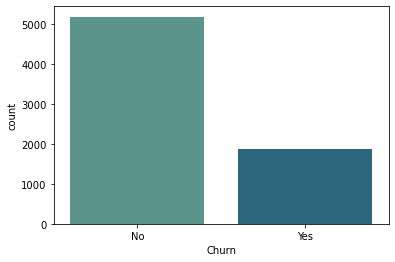

In [20]:
print(Telco_csr_churn['Churn'].value_counts())
_ = sns.countplot(x='Churn', data=Telco_csr_churn, palette='crest')

([<matplotlib.patches.Wedge at 0x7f8087371370>,
 [Text(-0.7393678277834755, 0.8144539368428058, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.40329154242735027, 0.44424760191425766, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

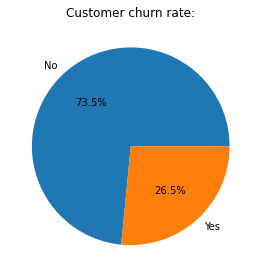

In [21]:
#Let's generate a pie chart- this may reveal a cleaner view for churn info
sizes = Telco_csr_churn['Churn'].value_counts(sort = True)
labels = np.unique(Telco_csr_churn.Churn)

# Visualize the data
plt.figure(figsize = (10,10))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')


The pie chart reveals the customer churn is at 26.5%.  This is good news! You want to keep your customers!

Let's explore  the variables a bit further. 

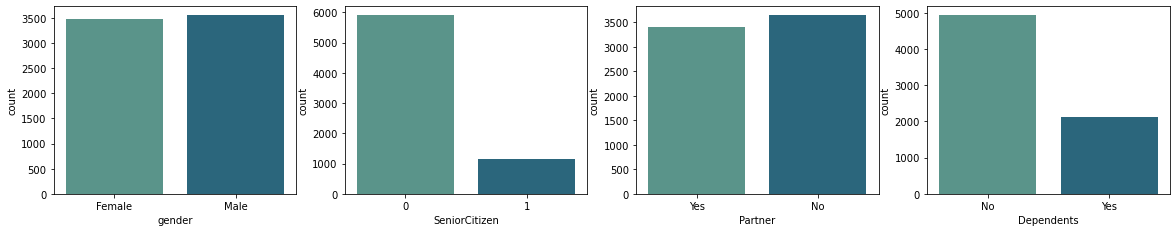

<Figure size 432x288 with 0 Axes>

In [22]:
#Let's bundle the Variables as specified by author
#First, let's begin with Customer Demographics
demographic_columns = ["gender", "SeniorCitizen", "Partner", "Dependents"]

plt.figure(figsize=(20, 20))
for n, variable in enumerate(demographic_columns):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=Telco_csr_churn, x=Telco_csr_churn[variable], ax=ax, palette='crest')
plt.show() 
plt.tight_layout()

#In Gender 0==Male and 1==Female




Let's explore Customer Account Variables.

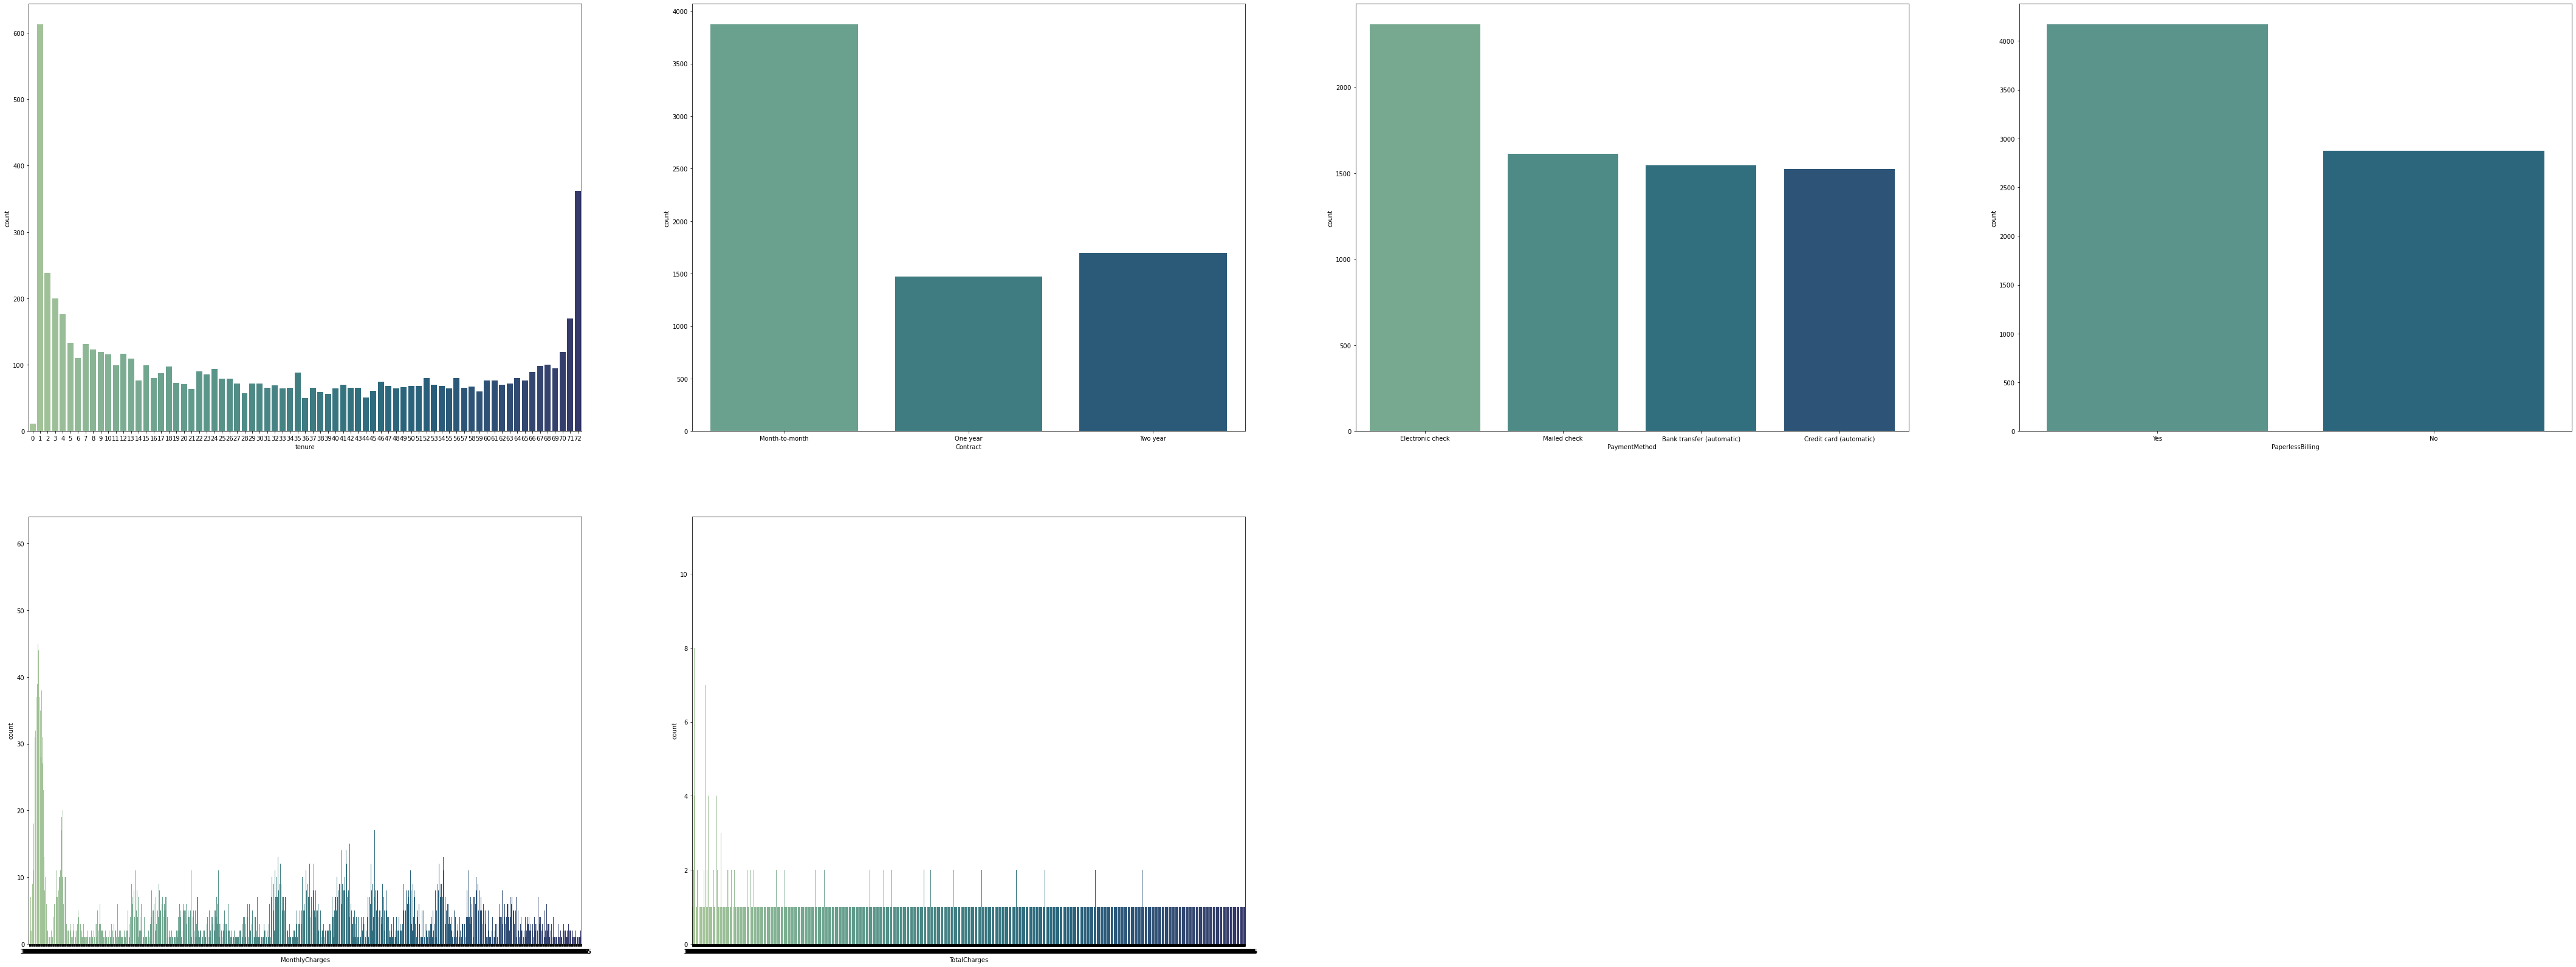

<Figure size 432x288 with 0 Axes>

In [38]:
account_columns = ["tenure", "Contract", "PaymentMethod", "PaperlessBilling", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(75, 75))
for n, variable in enumerate(account_columns):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=Telco_csr_churn, x=Telco_csr_churn[variable], ax=ax, palette='crest')
plt.show() 
plt.tight_layout()

Tenure is an important variable, as it should gives us information on how the customer churn rate changes with respect to customer tenure.Tenure, MonthlyCharges and TotalCharges need a bit more exploration.  Let's explore further.

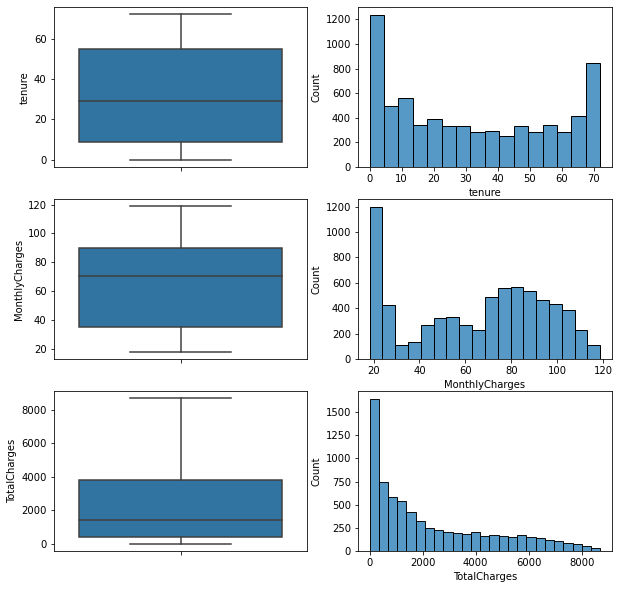

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
_ = sns.boxplot(y= Telco_csr_churn['tenure'])
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=Telco_csr_churn)

plt.subplot(3, 2, 3)
_ = sns.boxplot(y= Telco_csr_churn['MonthlyCharges'])
plt.subplot(3, 2, 4)
_ = sns.histplot(x='MonthlyCharges', data=Telco_csr_churn)

plt.subplot(3, 2, 5)
_ = sns.boxplot(y= Telco_csr_churn['TotalCharges'])
plt.subplot(3, 2, 6)
_ = sns.histplot(x='TotalCharges', data=Telco_csr_churn)

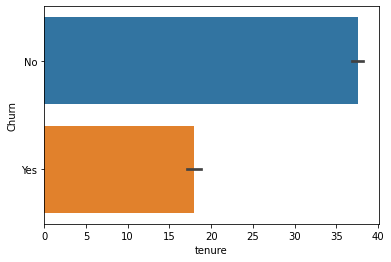

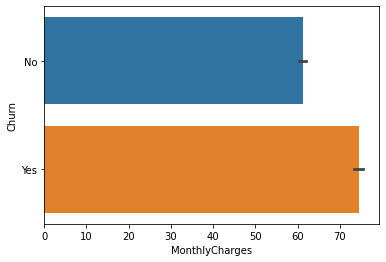

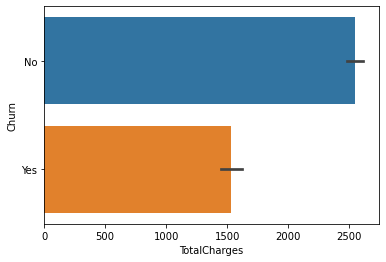

In [26]:
#Let's look at churn for 'tenure' 'MonthlyCharges' and 'TotalCharges'
for col in ('tenure', 'MonthlyCharges', 'TotalCharges'):
    sns.barplot(x = col, y = 'Churn', data = Telco_csr_churn)
    plt.show()

That looks better! The box plots show there are no outliers.

Let's compare the 'MonthlyCharges' versus 'TotalCharges'



<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

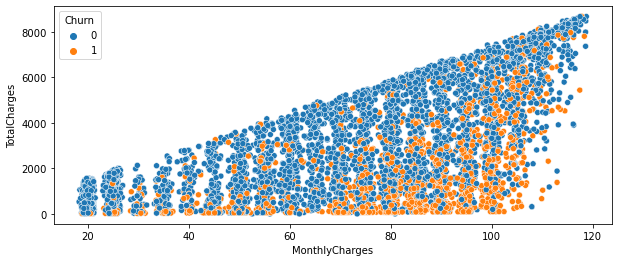

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=Telco_csr_churn, x='MonthlyCharges', y='TotalCharges', hue='Churn')

#in this scatterplot for Churn 0==No and 1==Yes

The scatterplot implies that there is a positive correlation between 'MonthlyCharges' and 'TotalCharges'
The churn rate increases with the increase in 'MonthlyCharges'

Let's now explore Customer Services Variables.

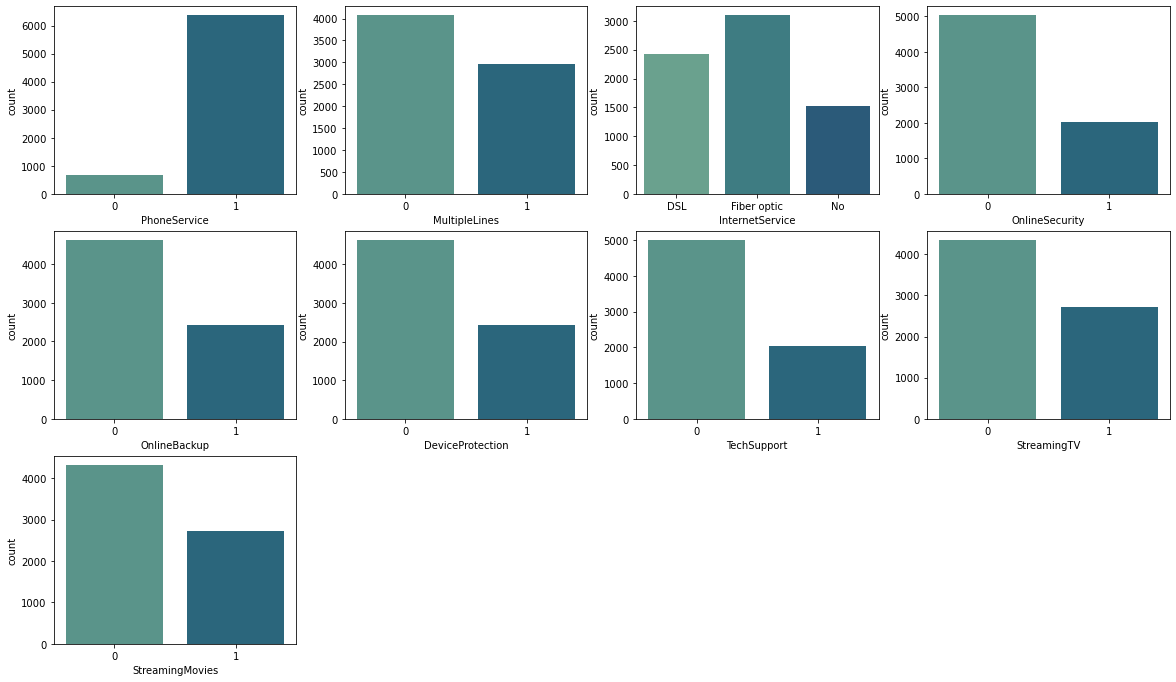

<Figure size 432x288 with 0 Axes>

In [ ]:
services_columns = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
"StreamingTV", "StreamingMovies"]

plt.figure(figsize=(20, 20))
for n, variable in enumerate(services_columns):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=Telco_csr_churn, x=Telco_csr_churn[variable], ax=ax, palette='crest')
plt.show() 
plt.tight_layout()

In [ ]:
Telco_csr_churn.gender = [1 if x == "Male" else 0 for x in Telco_csr_churn.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    Telco_csr_churn[col] = [1 if x == "Yes" else 0 for x in Telco_csr_churn[col]]      

#Let's look at the data  
Telco_csr_churn.head(10)  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
# Review the correlation between our target variable Churn and ALL others
Telco_csr_churn.corr()['Churn'].sort_values()

tenure             -0.352229
TotalCharges       -0.198324
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

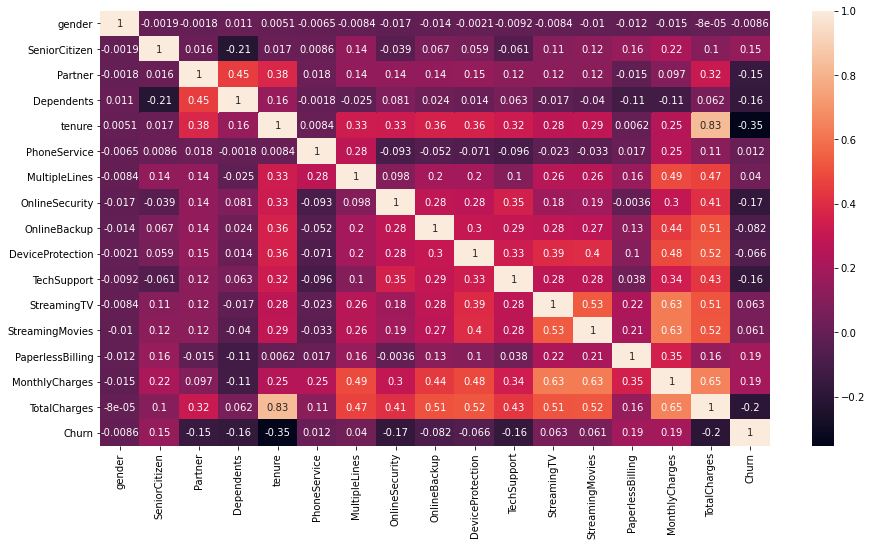

In [ ]:
#Seaborn plot to visualize correlation
plt.figure(figsize = (15,8))
sns.heatmap(Telco_csr_churn.corr(), annot=True)

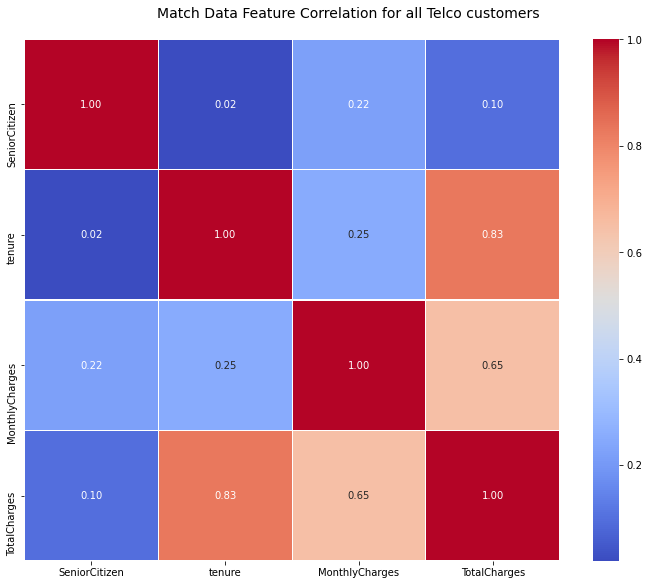

In [39]:
#Create a correlation heatmap for looking at the correlation of all variables/features for all Telco customers
corrmat = Telco_csr_churn.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all Telco customers', fontsize=14)

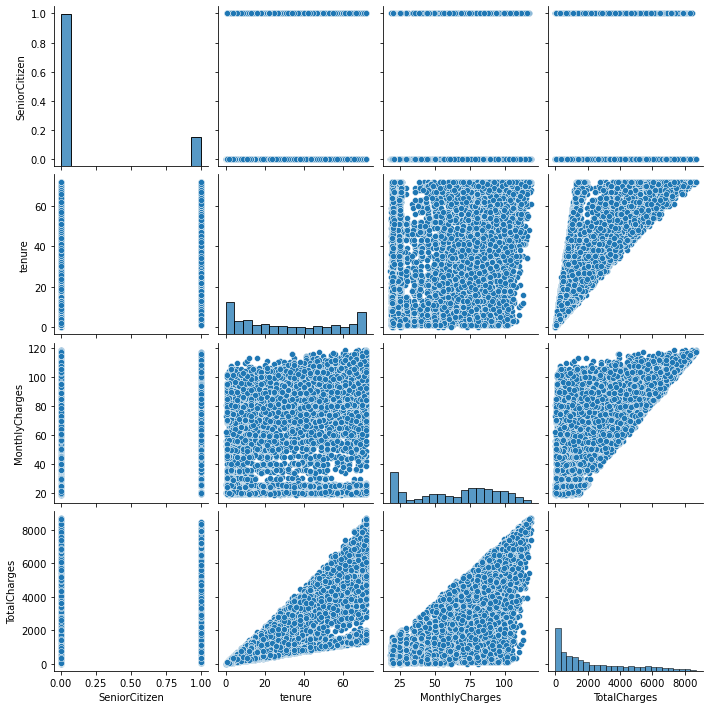

In [40]:
#Create a pairplot for all numeric variables
sns.pairplot(Telco_csr_churn,  palette='Set1')
plt.show()

Let's Explore the Demographic Variables to understand how they relate to customer churn. 

Which have the highest churn rate?

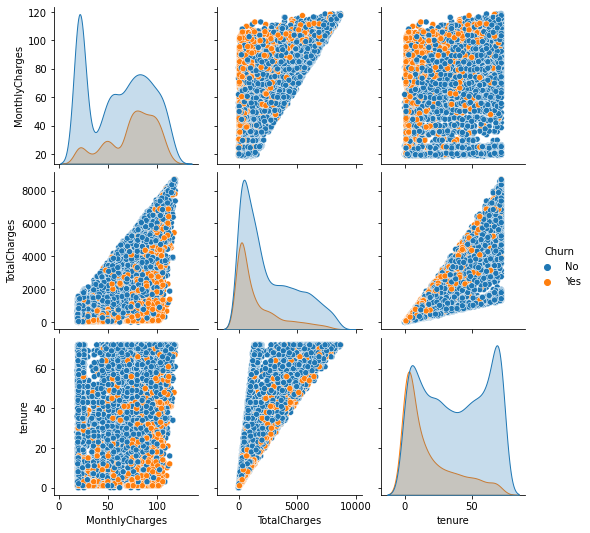

In [34]:
# Generate pairplots for all features.
highCorrCols = ['MonthlyCharges','TotalCharges','tenure', 'Churn']
sns.pairplot(Telco_csr_churn[highCorrCols], hue = 'Churn')

EDA Insights:

    'Tenure' has a positive skew, and a lot points are spread under 10 months value. 

    A sizeable portion of the customers are new customers, who have been with the company for about a year.

    New customers with approximately 1 year of tenure are the most likely to churn.
    
    We also revealed that the higher customer tenure is, the less likely to churn.

    There are some customers that have a very high tenure 70 months that are leaving the company. 
    These could possibly be outliers, or this could be related to other factors like dissatisfaction with other services or total charges.

    We also observed that higher monthly charges are linked with higher churn rate.          

Final Insights:

    Most customers with month-to-month contract and Fibre optic Internet Service churned.

    Customers with Two-Year contracts and No Internet service have the least churn rate.

    There is less customer churn when monthly charges as lower, with an increase in churn rate at approximately 75 

    Churn rate is higher for customers with Multiple Lines while those with No Phone Service have least churn rate.